In [8]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [9]:
# Step 2: Load Dataset
data = pd.read_csv("netflix_titles.csv")

<ipython-input-3-e3e78c5f18ca>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', palette='viridis')


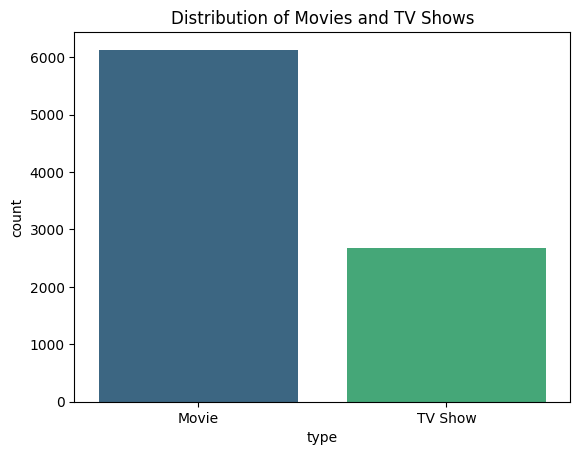

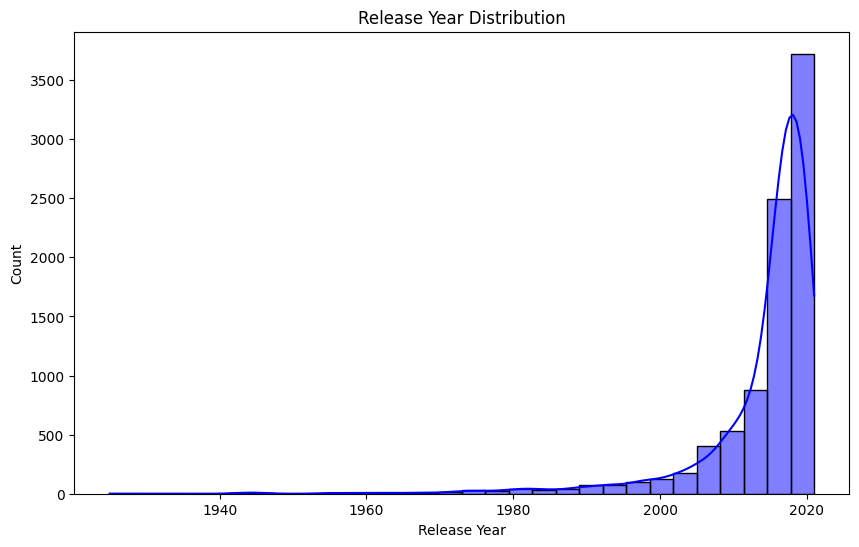

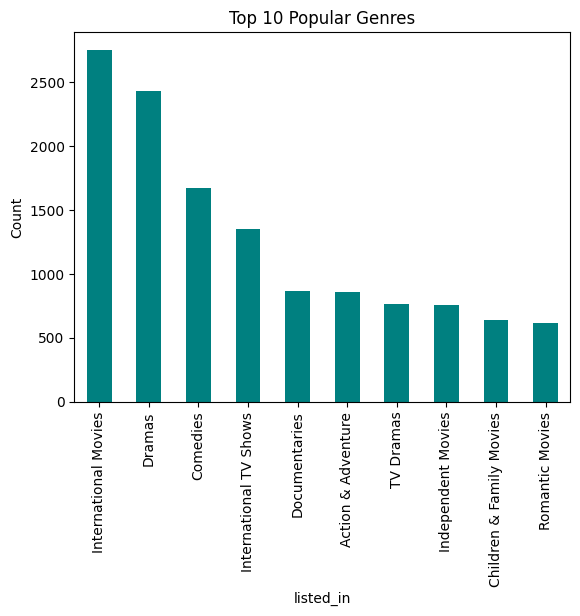

country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        200
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


In [3]:
# Standardize columns
columns_to_strip = ['title', 'director', 'cast', 'country', 'description']
for col in columns_to_strip:
    data[col] = data[col].str.strip()

# Step 4: EDA
# Movie vs TV Show Distribution
sns.countplot(data=data, x='type', palette='viridis')
plt.title('Distribution of Movies and TV Shows')
plt.show()

# Release Year Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['release_year'], bins=30, kde=True, color='blue')
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Most Popular Genres
popular_genres = data['listed_in'].str.split(', ').explode().value_counts()[:10]
popular_genres.plot(kind='bar', color='teal')
plt.title('Top 10 Popular Genres')
plt.ylabel('Count')
plt.show()

# Step 5: Insights Generation
# Display top countries producing movies and TV shows
country_distribution = data['country'].value_counts()[:10]
print(country_distribution)

In [10]:
# Step 6: Recommendation System
# Separate datasets for Movies and TV Shows
movies_data = data[data['type'] == 'Movie']
tvshows_data = data[data['type'] == 'TV Show']

# Content-Based Filtering for Movies
# Vectorize the 'description' field for Movies
vectorizer_movies = TfidfVectorizer(stop_words='english')
vectorized_desc_movies = vectorizer_movies.fit_transform(movies_data['description'])

# Compute similarity matrix for Movies
similarity_matrix_movies = cosine_similarity(vectorized_desc_movies)

# Content-Based Filtering for TV Shows
# Vectorize the 'description' field for TV Shows
vectorizer_tvshows = TfidfVectorizer(stop_words='english')
vectorized_desc_tvshows = vectorizer_tvshows.fit_transform(tvshows_data['description'])

# Compute similarity matrix for TV Shows
similarity_matrix_tvshows = cosine_similarity(vectorized_desc_tvshows)

In [11]:

# Function for Movie Recommendations
def recommend_movies(title, data, similarity_matrix):
    idx = data[data['title'].str.lower() == title.lower()].index[0]
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_matches = similarity_scores[1:11]  # Top 10 recommendations excluding the title itself
    recommendations = data.iloc[[i[0] for i in top_matches]]
    return recommendations[['title', 'type', 'listed_in', 'description']]


In [6]:
# Test Movie Recommendation System
print("Movie Recommendations for 'Dick Johnson Is Dead':")
print(recommend_movies("Dick Johnson Is Dead", movies_data, similarity_matrix_movies))

Movie Recommendations for 'Dick Johnson Is Dead':
                                        title   type  \
4877                                 End Game  Movie   
1066                                 The Soul  Movie   
7506                                     Moon  Movie   
5047                  The Cloverfield Paradox  Movie   
5233  The Death and Life of Marsha P. Johnson  Movie   
2674                                    Alelí  Movie   
6327                         Black Snake Moan  Movie   
4241                Secrets in the Hot Spring  Movie   
1731             A New York Christmas Wedding  Movie   
2380                             Riding Faith  Movie   

                                              listed_in  \
4877                                      Documentaries   
1066            Dramas, International Movies, Thrillers   
7506       Dramas, Independent Movies, Sci-Fi & Fantasy   
5047               Action & Adventure, Sci-Fi & Fantasy   
5233                        Documentar

In [13]:
# Function for TV Show Recommendations
def recommend_tvshows(title, data, similarity_matrix):
    # Get the index based on the tvshows_data DataFrame, not the original data
    idx = data[data['title'].str.lower() == title.lower()].index[0]
    # Reset the index of tvshows_data to ensure it starts from 0
    data = data.reset_index(drop=True)  # Reset index and drop old index column
    # Now get the index based on the reset index
    idx = data[data['title'].str.lower() == title.lower()].index[0]
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_matches = similarity_scores[1:11]  # Top 10 recommendations excluding the title itself
    recommendations = data.iloc[[i[0] for i in top_matches]]
    return recommendations[['title', 'type', 'listed_in', 'description']]

In [14]:

# Test TV Show Recommendation System
print("TV Show Recommendations for 'Stranger Things':")
print(recommend_tvshows("Stranger Things", tvshows_data, similarity_matrix_tvshows))

TV Show Recommendations for 'Stranger Things':
                         title     type  \
512            Sakho & Mangane  TV Show   
1538               Hardy Bucks  TV Show   
427   Sin senos sí hay paraíso  TV Show   
2532  Sin Senos sí Hay Paraíso  TV Show   
1778                   Requiem  TV Show   
2156            Bitter Daisies  TV Show   
1837               Broadchurch  TV Show   
1786                Collateral  TV Show   
1401               The Society  TV Show   
98               Gone for Good  TV Show   

                                              listed_in  \
512   Crime TV Shows, International TV Shows, TV Dramas   
1538                                        TV Comedies   
427   International TV Shows, Spanish-Language TV Sh...   
2532  International TV Shows, Spanish-Language TV Sh...   
1778  British TV Shows, International TV Shows, TV D...   
2156  Crime TV Shows, International TV Shows, TV Dramas   
1837  British TV Shows, Crime TV Shows, Internationa...   
1786  B

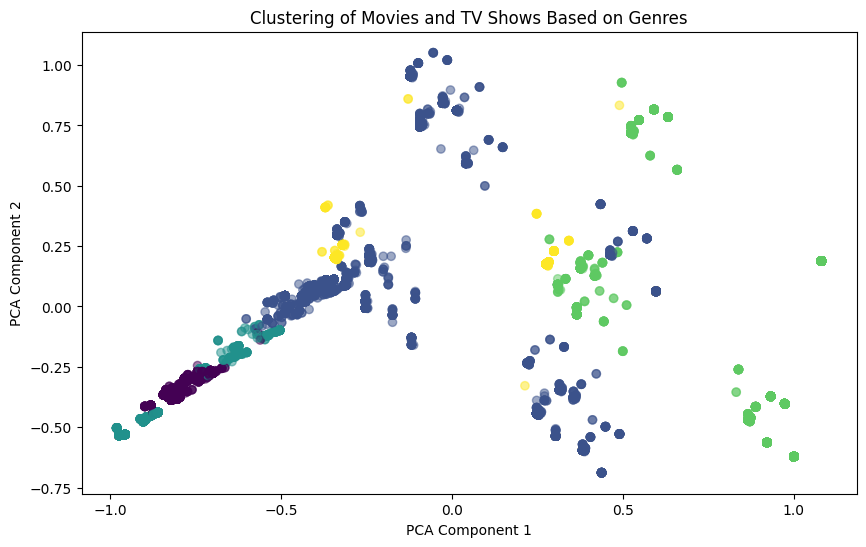

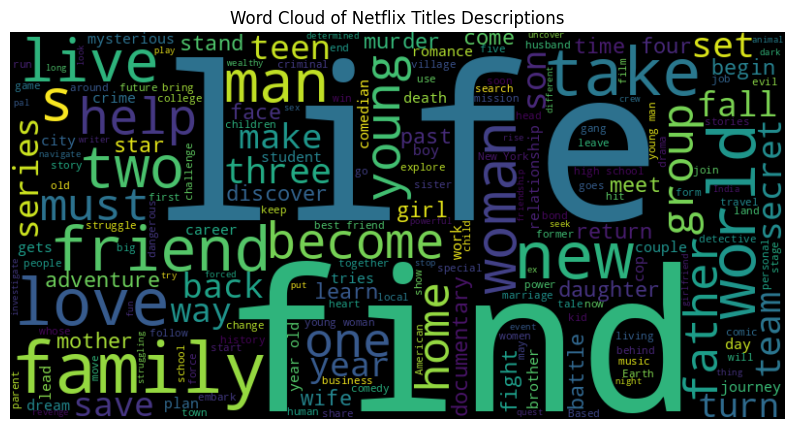

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wordcloud import WordCloud
# Step 7: Additional Creative Insights
# Clustering Based on Genres
all_genres = data['listed_in'].str.get_dummies(sep=', ')
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(all_genres)

# Visualizing Clusters Using PCA
pca = PCA(n_components=2)
genres_2d = pca.fit_transform(all_genres)
plt.figure(figsize=(10, 6))
plt.scatter(genres_2d[:, 0], genres_2d[:, 1], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering of Movies and TV Shows Based on Genres')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Word Cloud for Descriptions
text = " ".join(data['description'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles Descriptions')
plt.show()

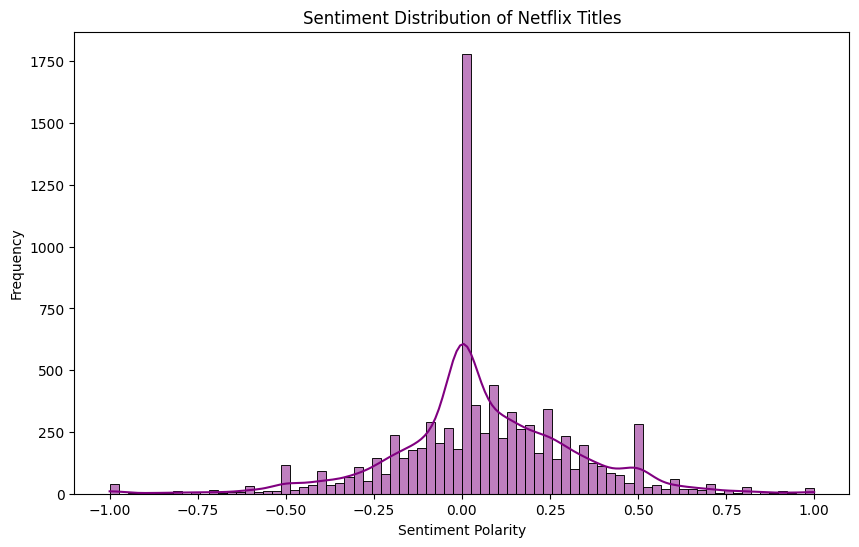

Most Positive Title:
title                                            Rock the Kasbah
description    When a has-been music producer gets stuck in A...
sentiment                                                    1.0
Name: 494, dtype: object

Most Negative Title:
title                                    Tobot Galaxy Detectives
description    An intergalactic device transforms toy cars in...
sentiment                                                   -1.0
Name: 100, dtype: object


In [16]:
from textblob import TextBlob
# Sentiment Analysis on Descriptions
# Analyze sentiments of descriptions
sentiments = data['description'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['sentiment'] = sentiments

# Visualize Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], kde=True, color='purple')
plt.title('Sentiment Distribution of Netflix Titles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Identifying Most Positive and Negative Titles
most_positive = data.loc[data['sentiment'].idxmax()]
most_negative = data.loc[data['sentiment'].idxmin()]

print("Most Positive Title:")
print(most_positive[['title', 'description', 'sentiment']])
print("\nMost Negative Title:")
print(most_negative[['title', 'description', 'sentiment']])